# ONA Demo Notebook for the vivainsights Python package

This notebook provides a demo on the Organizational Network Analysis (ONA) functions for the **vivainsights** package. For more information about the package, please see:
- [Documentation](https://microsoft.github.io/vivainsights-py/)
- [GitHub Page](https://github.com/microsoft/vivainsights-py/)

In this notebook, we will demo how to create analysis and visualizations with the group-to-group and person-to-person queries from Viva Insights.

## Set up


In [33]:
import vivainsights as vi

# load in-built datasets
g2g_data = vi.load_g2g_data() # load and assign in-built group-to-group query
p2p_data = vi.p2p_data_sim(size = 400) # Simulate a person-to-person query, using the `size` parameter to control for size

Both `g2g_data` and `p2p_data` here are in an edgelist structure: each row represents an interaction between groups, or between individuals. 

The schema of the two datasets look like the following: 

In [5]:
g2g_data.head()

PrimaryCollaborator_Organization SecondaryCollaborator_Organization   
0                         G&A East                           G&A West  \
1                         G&A West                           G&A East   
2                         G&A East                          G&A South   
3                         G&A West                          G&A South   
4                        G&A North                          G&A South   

   MetricDate  Meeting_Count  Group_Meeting_Time_Invested  
0  01/07/2023             12                        60.11  
1  01/07/2023              9                        70.45  
2  01/07/2023             16                        83.56  
3  01/07/2023             14                       121.00  
4  01/07/2023             18                       224.00

In [18]:
p2p_data.head()

PrimaryCollaborator_PersonId SecondaryCollaborator_PersonId   
0                     SIM_ID_0                       SIM_ID_1  \
1                     SIM_ID_1                       SIM_ID_2   
2                     SIM_ID_2                       SIM_ID_3   
3                     SIM_ID_3                       SIM_ID_4   
4                     SIM_ID_4                       SIM_ID_5   

  PrimaryCollaborator_Organization SecondaryCollaborator_Organization   
0                            Org A                              Org F  \
1                            Org F                              Org F   
2                            Org F                              Org E   
3                            Org E                              Org D   
4                            Org D                              Org C   

  PrimaryCollaborator_LevelDesignation SecondaryCollaborator_LevelDesignation   
0                              Level 0                                Level 1  \
1                              Level 1                                Level 2   
2                              Level 2                                Level 3   
3                              Level 3                                Level 4   
4                              Level 4                                Level 5   

  PrimaryCollaborator_City SecondaryCollaborator_City  StrongTieScore  
0                   City A                     City C               1  
1                   City C                     City B               1  
2                   City B                     City A               1  
3                   City A                     City B               1  
4                   City B                     City C               1

## Group-to-group collaboration

`network_g2g()` is the primary function for analyzing and visualizing the group-to-group query. By default, a plot is generated:

Primary field not provided. Assuming PrimaryCollaborator_Organization as the primary variable.
Secondary field not provided. Assuming SecondaryCollaborator_Organization as the secondary variable.


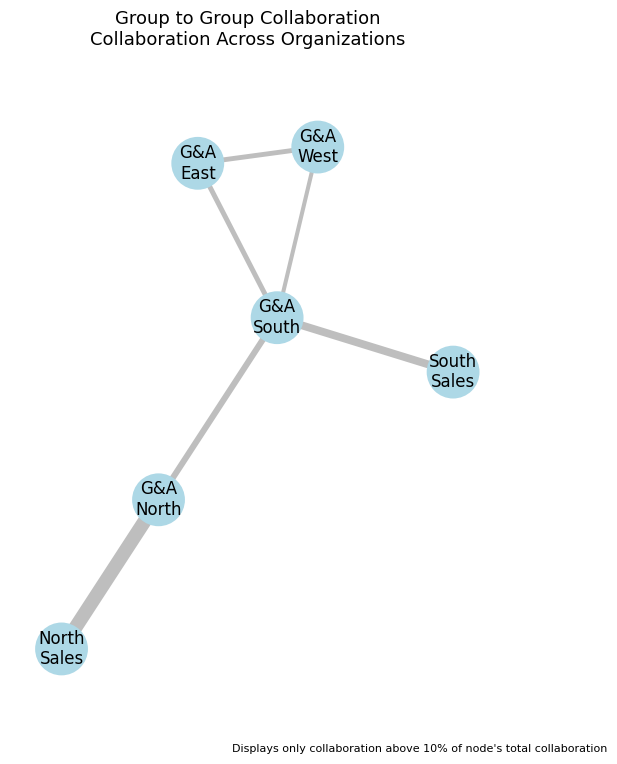

In [8]:
vi.network_g2g(data = g2g_data)

By default, the function also assumes that `PrimaryCollaborator_Organization` and `SecondaryCollaborator_Organization` are the variables specifying the groups. If you are using an HR attribute that isn't these two, please ensure to specify them in the parameters. 

When expressed in full, the following are the arguments for the function. The same output is yielded:

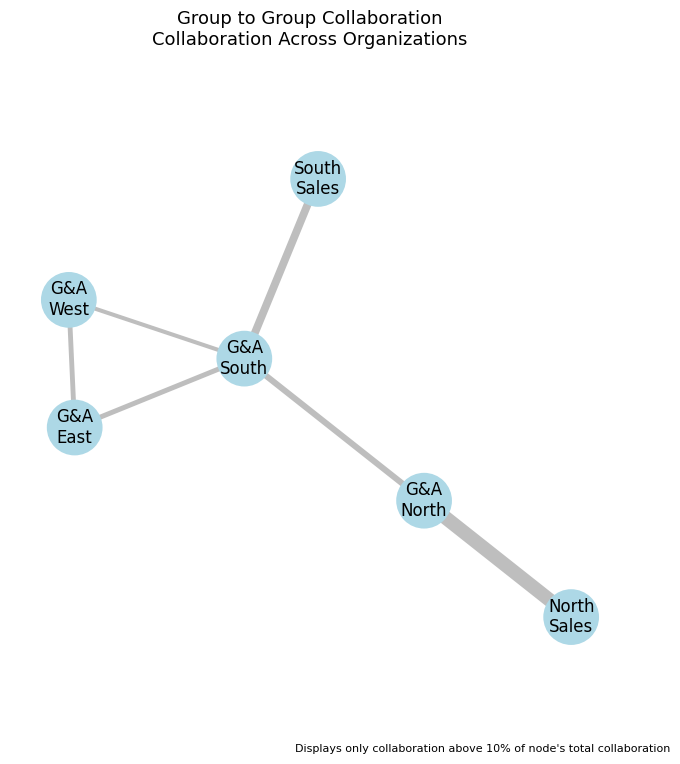

In [12]:
vi.network_g2g(
    data = g2g_data,
    primary = "PrimaryCollaborator_Organization",
    secondary = "SecondaryCollaborator_Organization",
    return_type = "plot"
)

There is an option to return an interaction matrix. The total collaboration one group has with another is divided with the total collaboration the group has with all other groups. 

In [9]:
vi.network_g2g(
    data = g2g_data,
    return_type = "table"
)

Primary field not provided. Assuming PrimaryCollaborator_Organization as the primary variable.
Secondary field not provided. Assuming SecondaryCollaborator_Organization as the secondary variable.


SecondaryOrg  G&A East  G&A North  G&A South  G&A West  North Sales   
PrimaryOrg                                                            
G&A East      0.358531        NaN   0.349892  0.291577          NaN  \
G&A North          NaN        NaN   0.436306       NaN     0.563694   
G&A South          NaN        NaN        NaN       NaN          NaN   
G&A West      0.275716        NaN   0.363138  0.361146          NaN   
North Sales        NaN   0.418182        NaN       NaN     0.581818   
South Sales        NaN        NaN   0.489927       NaN          NaN   

SecondaryOrg  South Sales  
PrimaryOrg                 
G&A East              NaN  
G&A North             NaN  
G&A South        1.000000  
G&A West              NaN  
North Sales           NaN  
South Sales      0.510073

## Person-to-person collaboration

`network_p2p()` is the primary function for analyzing and visualizing the person-to-person query. 

There are multiple return options, including: 
  - `'plot'` (default)
  - `'plot-pdf'`
  - `'sankey'`
  - `'table'`
  - `'data'`
  - `'network'`
  
Here is what it looks like if you return a plot: 

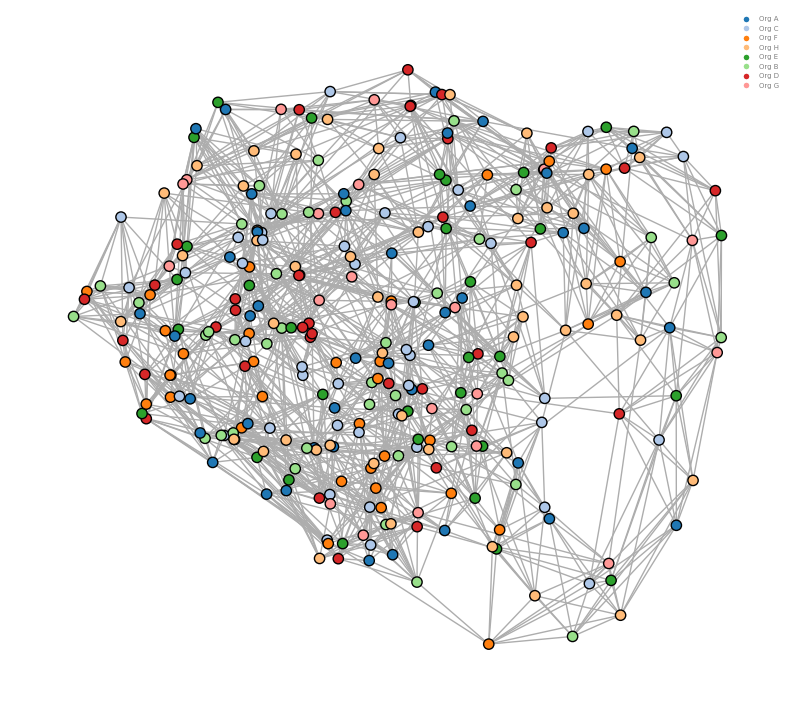

In [19]:
vi.network_p2p(data = p2p_data, return_type = "plot") 

You can also return a table, which you can specify the average centrality if you include it in the parameters.

In [34]:
vi.network_p2p(data = p2p_data, centrality = "betweenness", return_type = "table")

C:\Users\mac\AppData\Local\Programs\Python\Python38\lib\site-packages\vivainsights\network_summary.py:55: RuntimeWarning:

Graph is directed and acyclic; eigenvector centralities will be zeros. at src/centrality/eigenvector.c:284



n  betweenness  closeness     degree  eigenvector  pagerank
Organization                                                              
Org A         58   890.485493   0.264019   9.879310          0.0  0.002578
Org B         57   924.404600   0.263375   9.947368          0.0  0.002458
Org C         56   834.253449   0.262339  10.071429          0.0  0.002401
Org D         45   875.094872   0.262738   9.955556          0.0  0.002439
Org E         46   769.183561   0.262347   9.847826          0.0  0.002387
Org F         34   652.605766   0.259868   9.970588          0.0  0.001573
Org G         35  1082.603905   0.268057  10.400000          0.0  0.003064
Org H         69   991.639714   0.265847  10.028986          0.0  0.002835

Since the underlying implementation is **igraph**, you can also return the underlying network as an igraph object. This allows you to perform further customizations or wrangling on top of the generated network object.

In [27]:
out_g = vi.network_p2p(data = p2p_data, return_type = "network")
print(out_g)

IGRAPH DN-- 300 1500 --
+ attr: Organization (v), name (v), node (v), node_size (v)
+ edges (vertex names):
  SIM_ID_0 -> SIM_ID_1, SIM_ID_2, SIM_ID_5, SIM_ID_256, SIM_ID_247,
SIM_ID_255, SIM_ID_295, SIM_ID_296, SIM_ID_297, SIM_ID_298
  SIM_ID_1 -> SIM_ID_2, SIM_ID_3, SIM_ID_4, SIM_ID_5, SIM_ID_6, SIM_ID_188,
SIM_ID_296, SIM_ID_299
  SIM_ID_2 -> SIM_ID_3, SIM_ID_4, SIM_ID_5, SIM_ID_6, SIM_ID_7, SIM_ID_297,
SIM_ID_299
  SIM_ID_3 -> SIM_ID_4, SIM_ID_5, SIM_ID_6, SIM_ID_7, SIM_ID_8, SIM_ID_141,
SIM_ID_298, SIM_ID_299
  SIM_ID_4 -> SIM_ID_5, SIM_ID_6, SIM_ID_7, SIM_ID_8, SIM_ID_9, SIM_ID_41,
SIM_ID_299
  SIM_ID_5 -> SIM_ID_6, SIM_ID_7, SIM_ID_9, SIM_ID_10
  SIM_ID_6 -> SIM_ID_7, SIM_ID_8, SIM_ID_10, SIM_ID_11, SIM_ID_165, SIM_ID_199
  SIM_ID_7 -> SIM_ID_8, SIM_ID_9, SIM_ID_10, SIM_ID_11, SIM_ID_12, SIM_ID_66
  SIM_ID_8 -> SIM_ID_9, SIM_ID_10, SIM_ID_11, SIM_ID_13, SIM_ID_42, SIM_ID_245
  SIM_ID_9 -> SIM_ID_10, SIM_ID_11, SIM_ID_12, SIM_ID_13, SIM_ID_14
 SIM_ID_10 -> SIM_ID_90, SIM_ID_12, S

### Community Detection

Community detection is also possible. You can specify which community detection algorithm to use, and provide the corresponding arguments. The community detection algorithms are wrappers of the ones used in **igraph**. 

Options include: 

  - `"multilevel"` (a version of louvain)
  - `"leiden"`
  - `"edge_betweenness"`
  - `"fastgreedy"`
  - `"infomap"`
  - `"label_propagation"`
  - `"leading_eigenvector"`
  - `"optimal_modularity"`
  - `"spinglass"`
  - `"walk_trap"`

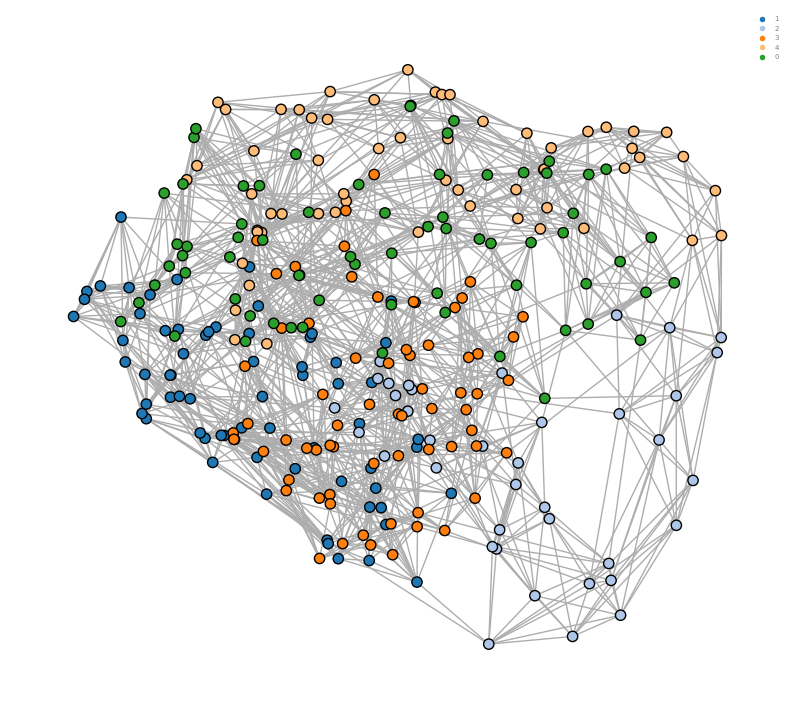

In [22]:
vi.network_p2p(data = p2p_data, community = "leiden", comm_args = {"resolution": 0.01}, return_type = "plot")

After performing the community detection, you can run a table of the communities identified by the algorithm. 

In [24]:
vi.network_p2p(data = p2p_data, community = "leiden", comm_args = {"resolution": 0.01}, return_type = "table")

Organization cluster   n
0         Org A       0  10
1         Org A       1   9
2         Org A       2   5
3         Org A       3  10
4         Org A       4   9
5         Org B       0   9
6         Org B       1  10
7         Org B       2   5
8         Org B       3   9
9         Org B       4   9
10        Org C       0   9
11        Org C       1  10
12        Org C       2   5
13        Org C       3  11
14        Org C       4   8
15        Org D       0   9
16        Org D       1   7
17        Org D       2   5
18        Org D       3   7
19        Org D       4   7
20        Org E       0   8
21        Org E       1   7
22        Org E       2   5
23        Org E       3   7
24        Org E       4   7
25        Org F       1  23
26        Org F       2  11
27        Org G       0   7
28        Org G       3   8
29        Org G       4   7
30        Org H       0  16
31        Org H       2   2
32        Org H       3  16
33        Org H       4  13

There is also an option to return a sankey chart, as per below:

In [31]:
vi.network_p2p(data = p2p_data, community = "leiden", comm_args = {"resolution": 0.01}, return_type = "sankey")

### Customizing the visualization

There are various ways you can customize the network visualization. 

For instance, you can change the position of the legends.

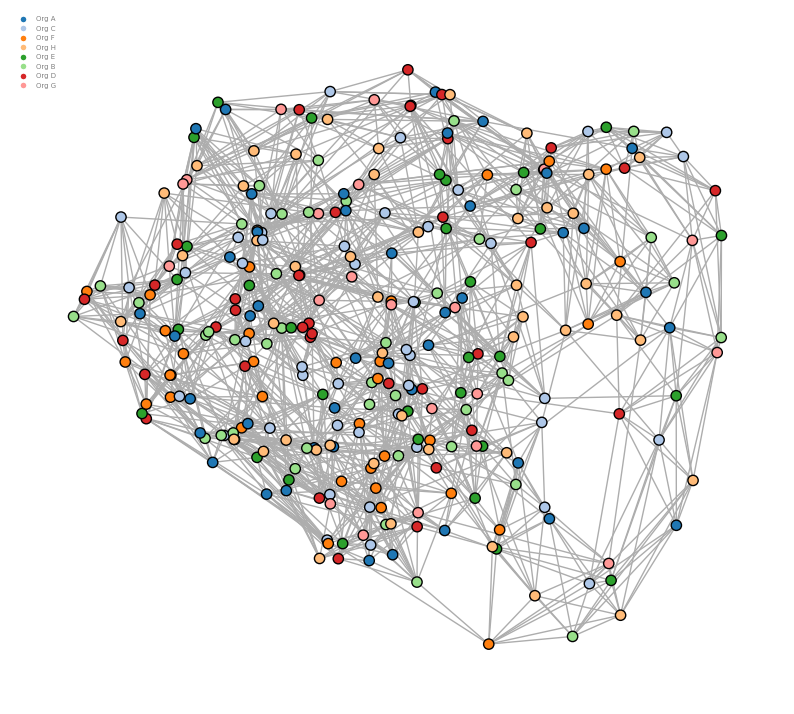

In [21]:
vi.network_p2p(data = p2p_data, legend_pos = "upper left", return_type = "plot")